# EDA
Version: 02.04.2025

In [1]:
# imports
import os
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

# Apply a style
plt.style.use('ggplot')


# Avg. token count per sura

In [2]:
# Loading data
df = pd.read_csv("stats/avg_sura_tokens.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sura_id          114 non-null    int64  
 1   avg_tokens_sura  114 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


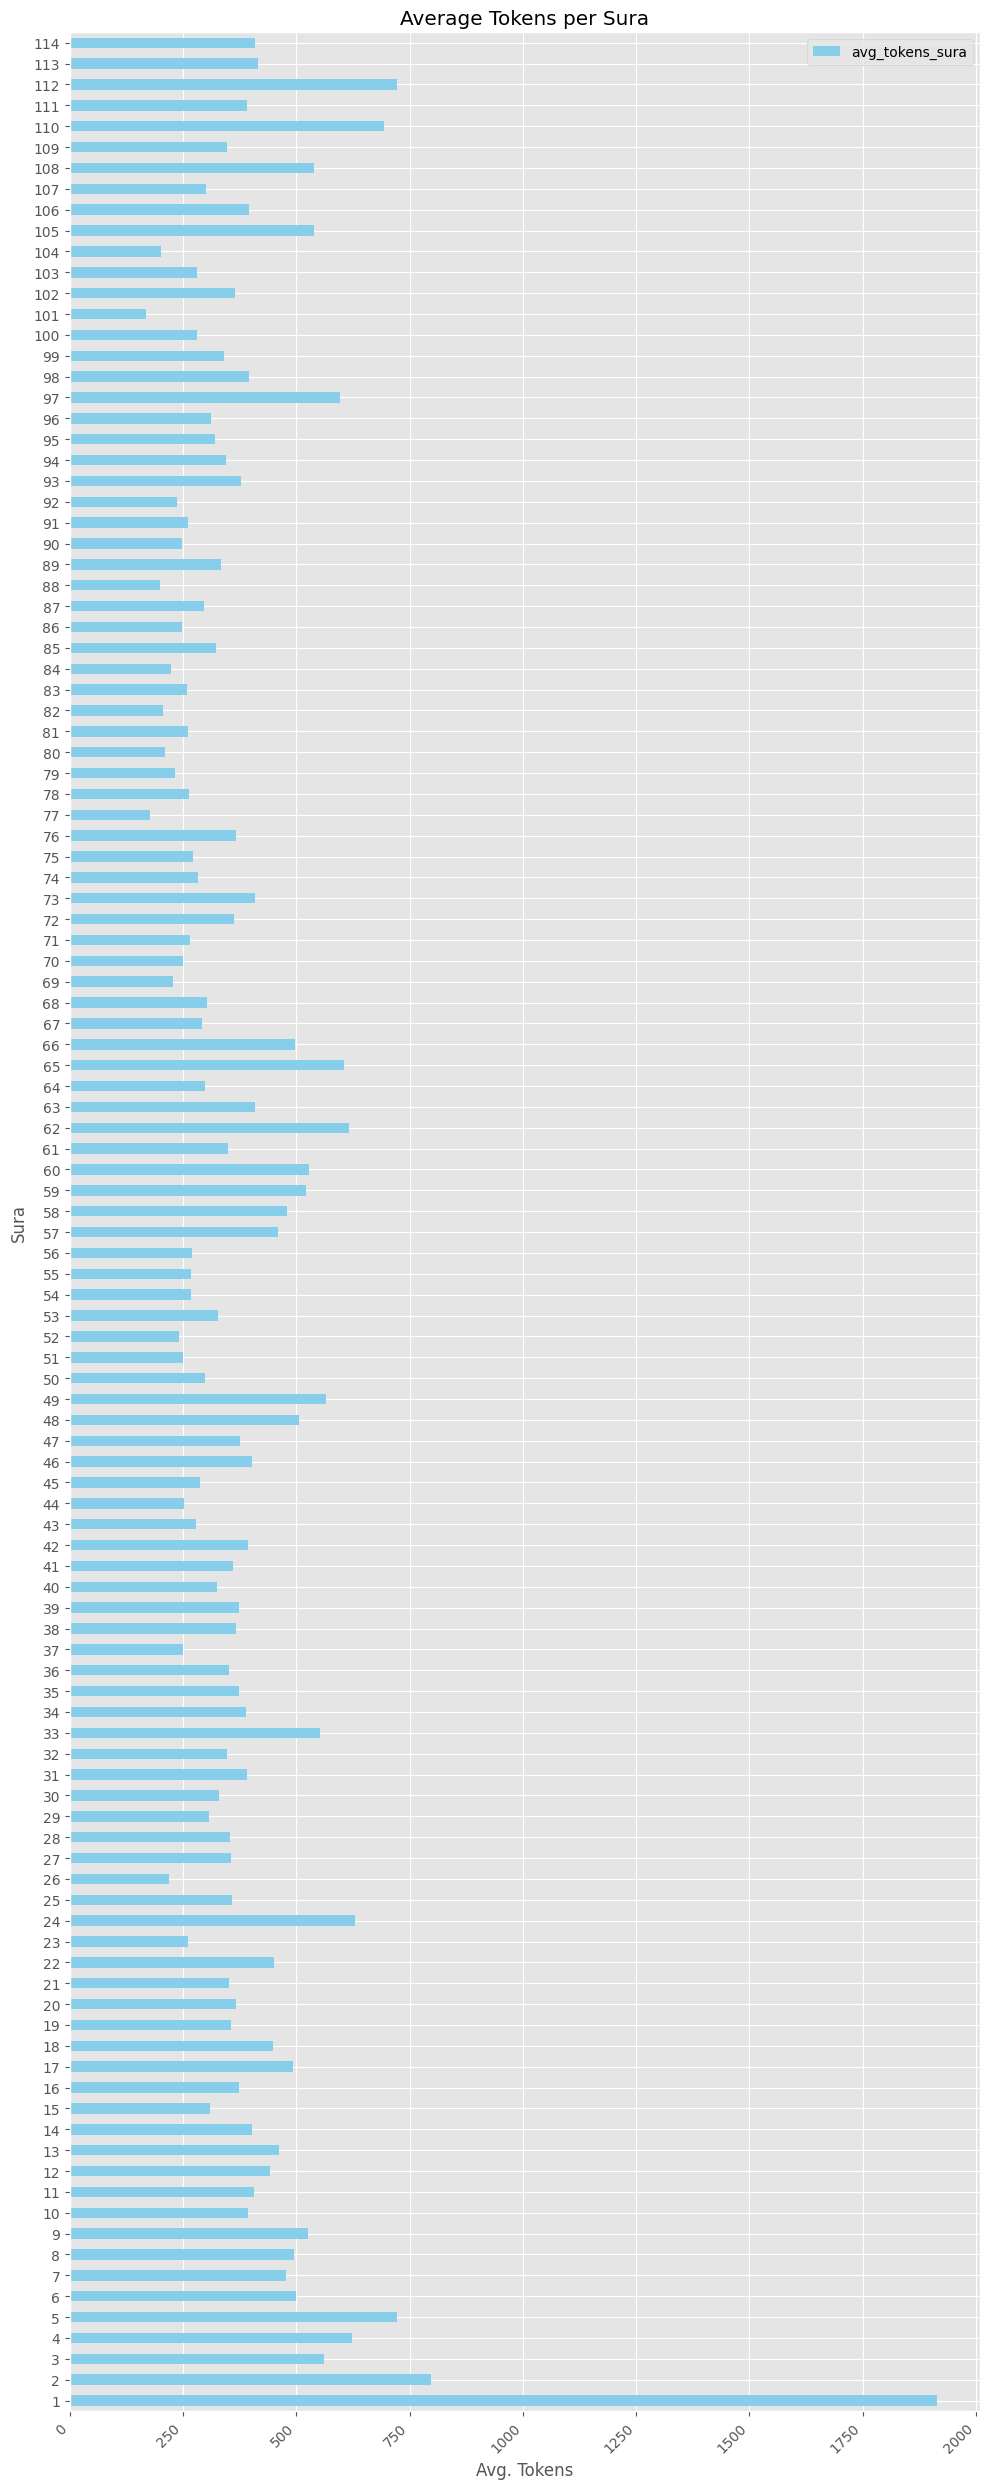

In [9]:
df_sorted = df.sort_values("sura_id")
df_sorted.plot(kind="barh", x="sura_id", y="avg_tokens_sura", color="skyblue", figsize=(10, 25))
plt.title("Average Tokens per Sura")
plt.xlabel("Avg. Tokens")
plt.ylabel("Sura")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("images/avg_sura_tokens.jpg")

# Avg. tokens per school of law

In [3]:
# Loading data
df = pd.read_csv("stats/avg_tokens_school_of_law.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            10 non-null     object 
 1   avg_token_count  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


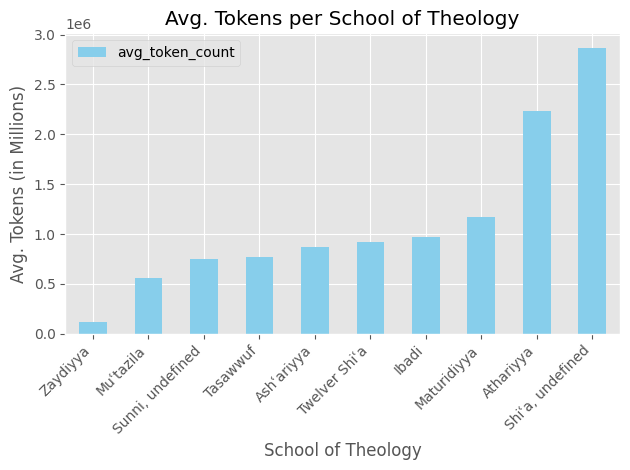

In [29]:
df_sorted = df.sort_values("avg_token_count")
df_sorted.plot(kind="bar", x="label", y="avg_token_count", color="skyblue")
plt.title("Avg. Tokens per School of Theology")
plt.xlabel("School of Theology")
plt.ylabel("Avg. Tokens (in Millions)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("images/avg_tokens_sot.jpg")

In [5]:
df

,label,avg_token_count
0,"Shiʿa, undefined",2.869452e+06
1,Athariyya,2.236359e+06
2,Maturidiyya,1.167141e+06
3,Ibadi,9.750465e+05
4,Twelver Shiʿa,9.223427e+05
5,Ashʿariyya,8.724479e+05
6,Tasawwuf,7.719052e+05
7,"Sunni, undefined",7.488084e+05
8,Muʿtazila,5.589885e+05
9,Zaydiyya,1.186173e+05


# Avg. quotes per author

In [2]:
# Loading data
df = pd.read_csv("stats/quote_distribution.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tafsir_id           230 non-null    int64  
 1   type                230 non-null    object 
 2   author_name         230 non-null    object 
 3   school_of_theology  230 non-null    object 
 4   quote_count         230 non-null    int64  
 5   token_count         230 non-null    int64  
 6   quote_per_1k_token  230 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 12.7+ KB


In [4]:
df.head()

,tafsir_id,type,author_name,school_of_theology,quote_count,token_count,quote_per_1k_token
0,8,Quran,Ǧalāl ad-Dīn ʿAbd ar-Raḥmān Ibn Abī Bakr as-Su...,"Sunni, undefined",50216,186564,269.162325
1,10,Quran,Muḥammad ibn Yaʿqūb al-Fīrūzābādī,"Sunni, undefined",29855,219007,136.319844
2,60,Quran,Abū 'l-Ḥasan ʿAlī ibn Aḥmad al-Wāḥidī,"Sunni, undefined",16852,168095,100.252833
3,33,Quran,ʿAbd ar-Razzāq Kamāl ad-Dīn ibn Abī al-Ġanāʾim...,"Sunni, undefined",18494,208712,88.610142
4,95,Quran,ʿAbd al-Qādir ibn Abū Ṣālīḥ al-Ǧīlānī,Tasawwuf,40736,477252,85.355326


In [14]:
## Overall abs. quote count (sum of quran + hadith + poetry)
df_abs_quotes = df.groupby("author_name")["quote_count"].sum().reset_index()

In [23]:
# Adding the abs token count from the original dataframe
df_abs_quotes["token_count"] = df_abs_quotes["author_name"].map(lambda x: df[df["author_name"] == x]["token_count"].iloc[0])

In [39]:
# Adding the school of theology from the original dataframe
df_abs_quotes["school_of_theology"] = df_abs_quotes["author_name"].map(lambda x: df[df["author_name"] == x]["school_of_theology"].iloc[0])

In [40]:
# Calculating the rel. number of quotes per 1000 tokens
df_abs_quotes["rel_quotes_per_1k_tokens"] = (df_abs_quotes["quote_count"] / df_abs_quotes["token_count"]) * 1000

In [41]:
# Sanity check
df_abs_quotes.sort_values("rel_quotes_per_1k_tokens", ascending=False)

,author_name,quote_count,token_count,rel_quotes_per_1k_tokens,school_of_theology
59,Ǧalāl ad-Dīn ʿAbd ar-Raḥmān Ibn Abī Bakr as-Su...,90194,186564,483.448039,"Sunni, undefined"
38,Muḥammad ibn Yaʿqūb al-Fīrūzābādī,29860,219007,136.342674,"Sunni, undefined"
0,Abū 'l-Ḥasan ʿAlī ibn Aḥmad al-Wāḥidī,16870,168095,100.359916,"Sunni, undefined"
11,Aṯīr ad-Dīn Abū Ḥayyān Muḥammad ibn Yūsuf ibn...,51369,514169,99.906840,"Sunni, undefined"
45,Muḥammad ʿAlī aṣ-Ṣābūnī,53366,553166,96.473753,"Sunni, undefined"
...,...,...,...,...,...
21,Ibrāhīm al-Qaṭṭān,4896,385548,12.698808,"Sunni, undefined"
16,Aḥmad ibn Ḥamad al-Ḫalīlī,2576,244890,10.519009,Ibadi
53,Ṣadr ad-Dīn Muḥammad aš-Šīrāzī,5911,601338,9.829746,Twelver Shiʿa
31,Muḥammad Rašīd Riḍā,17762,1876028,9.467876,Ashʿariyya


In [42]:
df_abs_quotes.sort_values("rel_quotes_per_1k_tokens", ascending=False).to_csv("stats/abs_quote_distribution.csv")